In [4]:
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.mlab import griddata
import numpy as np
from scipy.stats import norm
import sfdmap

In [5]:
# def findPrior(r,l,b):
#     l = np.linspace(0., 360., noStepsAngle)
#     xlen = (((r*np.cos(np.deg2rad(l)))-8))
#     ylen = ((r*np.sin(np.deg2rad(l))))
#     dist = ((xlen**2)+(ylen**2))**0. 

#     rogrim = 1
#     rtgrim = 1.9
#     rdgrim = 3.5
#     rzgrim = 0.41
#     rmgrim = 6.5
#     gamma = 1.8
#     bulge = 0.66
#     disc = 0.33

#     rowmv = ((bulge*((dist/rogrim)**gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)))))
#     rowob = 
    
#     P = r**2*rowmw*rowob
#     return P

In [40]:
def newWeight(noSteps,fullPeriod,rM,satMag=5.7,limMag=21):
    #bayestar = BayestarQuery(max_samples=2)
    ebv=[]
    ebv1d = []
    #m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')
    rogrim = 1.
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 0.66
    disc = 0.33    
    distance = np.linspace(0.1,30.1,noSteps)
    
    
    number = 0
    l = np.linspace(0., 360., noSteps)
    b = np.linspace(0., 180., (noSteps/2))
    #R = 2.273
#     for z, bangle in enumerate(b):
#         for i,x in enumerate(l):
#             ebvPerD = []
#             for d,dis in enumerate(distance):
#                 coords = SkyCoord(x*units.deg, bangle*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                 ebvPerD.append(bayestar(coords, mode='median'))
#             string = str(ebvPerD)
#             if 'nan' in string:
#                 if number == 0:
#                     startNan = i
#                 ebvPerD = []
#                 number += 1
#                 for d,dis in enumerate(distance):
#                     angle = startNan-(x-startNan)
#                     coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
#                     ebvPerD.append(bayestar(coords, mode='median'))
#             ebv.append(ebvPerD)

#     mag = []
#     #test = {}
#     for y in range(len(l)):
#         magperanlge = []
#         for x,item in enumerate(distance): 
#             magperanlge.append((5*np.log10((item*(1000/10)))+rM)+((ebv[y][x])*R))
#             #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
#         mag.append(magperanlge)
        
    totmag, totmaglist, brightProfile, brightProfilelist = [],[],[],[]
    xtotal, xlist, ytotal, ylist = [],[],[],[]
    Rd = 3 #kpc
    counter = 0
    othercounter = 0
    prior = []
    Prior = []
    anglesNew = []
    distNew = []
    brightProfilelist = []
    magProbs = []
    for z,bangle in enumerate(b):
        for x,angle in enumerate(l):        
            #prior = []
            smallDist = []
            smallAngle = []
            #xtotal = []
            #ytotal = []
            for y,item in enumerate(distance):
                dists = item*np.cos(np.deg2rad(l[x]))
                xlen = (((dists*np.cos(np.deg2rad(l[x])))-8))
                ylen = ((dists*np.sin(np.deg2rad(l[x]))))

                if xlen**2+ylen**2 < 15**2:
                    xtotal.append(xlen)
                    ytotal.append(ylen)
                    #totmaglist.append(mag[x][y])
                    dist = ((xlen**2)+(ylen**2))**0.5
#                     smallDist.append(dist)
#                     smallAngle.append(l)
                    #brightProfilelist.append(np.exp(-(dist/Rd)))
                    bp = (bulge*(((((dist**2))**0.5)/rogrim)**-gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim))))
                    brightProfilelist.append(bp)
                    othercounter += 1
                    magProb = 1
#                     if mag[x][y] > satMag and mag[x][y] < limMag:
#                         magProb = 1
#                     else:
#                         magProb = 1
#                     magProbs.append(magProb)
                    prior.append((item**2)*bp*magProb)
                

#         xlist.append(xtotal)
#         ylist.append(ytotal)
#         #totmag.append(totmaglist)
#         anglesNew.append(smallAngle)
#         distNew.append(distNew)
#         brightProfile.append(brightProfilelist)
        #Prior.append(prior)
#     sumbp = sum(brightProfilelist)
#     summp = sum(magProbs)
#    normBp = [x/sumbp for x in brightProfilelist]
#    priorSum = sum(prior)
    #Prior = [x for x in prior]
    Prior = [x/(max(prior)) for x in prior]
#     #print(totmag)
#     print('xlist - ', xlist)
#     print('ylist - ', ylist)#
#     print('Prior - ', newPrior)
    #im = plt.pcolor(xlist,ylist,newPrior,cmap='plasma_r',vmin=0,vmax=1)
    def grid(x, y, z, resX=100, resY=100):
        "Convert 3 column data to matplotlib grid"
        print(min(x), max(x), resX)
        print(min(y), max(y), resY)
        xi = np.linspace(min(x), max(x), resX)
        yi = np.linspace(min(y), max(y), resY)
        Z = griddata(x, y, z, xi, yi,interp='linear')
        X, Y = np.meshgrid(xi, yi)
        return X, Y, Z

#     X, Y, Z = grid(xtotal, ytotal, magProbs)#Prior)
#     plt.contourf(X, Y, Z)
#     plt.colorbar(label='Prior')
#     plt.xlabel('Distance (kpc)')
#     plt.ylabel('Distance (kpc)')
#     plt.show()  
#     im = plt.pcolor(X,Y,Z,cmap='plasma_r')
#     plt.colorbar(im)
#     plt.show()
#     print(len(xtotal))
#     print(len(ytotal))
#     print(len(Prior))
#     print(max(Prior))
#     print(min(Prior))
    X, Y, Z = grid(xtotal, ytotal,Prior)
    plt.contourf(X, Y, Z)
    plt.colorbar(label='Prior')
    plt.xlabel('Distance (kpc)')
    plt.ylabel('Distance (kpc)')
    plt.show()  
    im = plt.pcolor(X,Y,Z,cmap='plasma_r')
    plt.colorbar(im)
    plt.show()
    
    return Prior

-8.0 14.6 100
-14.3134005702 14.3134005702 100


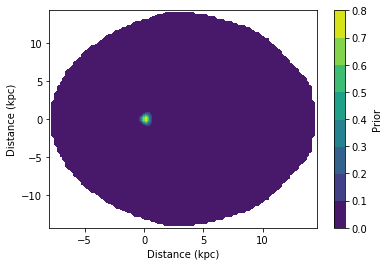

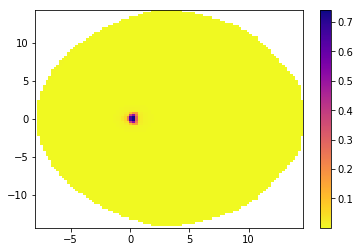

In [42]:
x = newWeight(61,0,3.5)

-7.99890738004 14.1014500358 100
-13.9730326299 13.9730326299 100


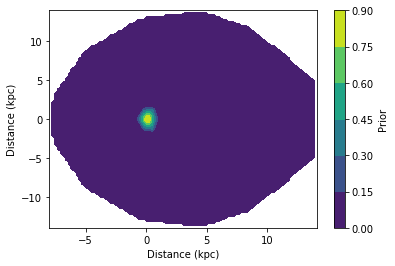

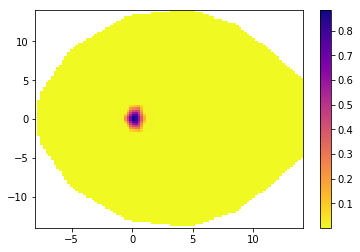

In [43]:
x = newWeight(31,0,3.5)

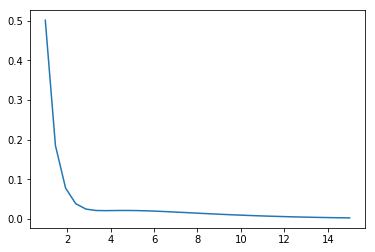

[0.50068464449674799, 0.1851227352067468, 0.078120100320084124, 0.038762198692922342, 0.025245928445631755, 0.021595130176382118, 0.021236244453265003, 0.021568173542618273, 0.021697912546357449, 0.02141868706526975, 0.020763116809774777, 0.019825460973024258, 0.018700245978287029, 0.017465627627557902, 0.016181684299789372, 0.014892807670250044, 0.013630753170083831, 0.012417413003802589, 0.01126712289982649, 0.010188516488799641, 0.0091859895106192278, 0.0082608419794365749, 0.0074121604720316179, 0.0066374936464834557, 0.0059333648683148965, 0.005295657476608007, 0.0047199010916148375, 0.0042014814625586962, 0.0037357915631272593, 0.0033183378024992161, 0.0029448121689112116]


In [35]:
rogrim = 1.
rtgrim = 1.9
rdgrim = 3.5
rzgrim = 0.41
rmgrim = 6.5
gamma = 1.8
bulge = 0.66
disc = 0.33    
r = np.linspace(1,15,31)
bp = []
for x,dist in enumerate(r):
    bp.append((bulge*((dist/rogrim)**-gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)))))
plt.plot(r,bp)
plt.show()
print(bp)

In [36]:
l = np.linspace(0., 360., 61)
distance = np.linspace(0.1,30.1,61)
im = plt.pcolor(l,distance,newPrior,cmap='plasma_r',vmin=0,vmax=1)

NameError: name 'newPrior' is not defined

In [37]:
len(prior[0])

NameError: name 'prior' is not defined